In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
csv_test = pd.read_csv('/Users/kimginam/ML/Melbourne_housing_FULL.csv')
df = csv_test
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
df['Rooms'].value_counts()

3     15084
2      8332
4      7956
5      1737
1      1479
6       204
7        32
8        19
10        6
9         4
12        3
16        1
Name: Rooms, dtype: int64

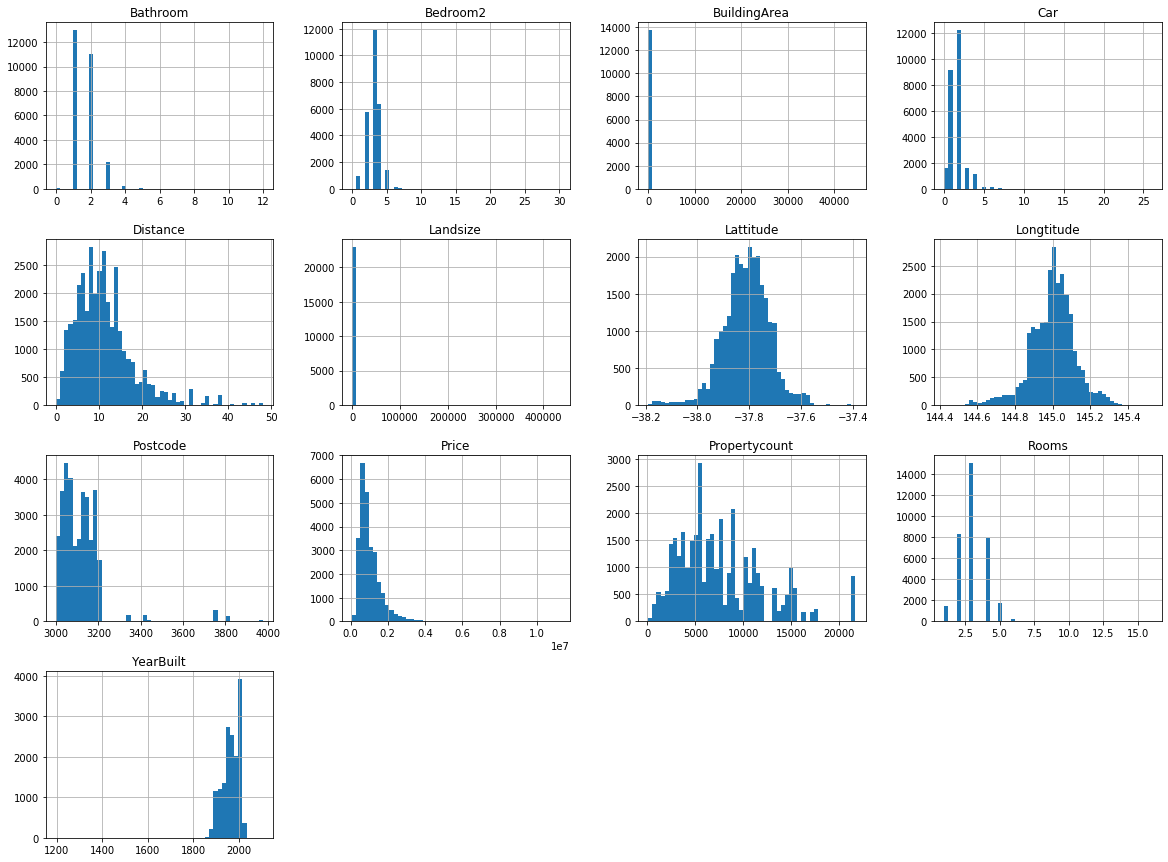

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.1)

In [8]:
print(len(train_set), "train +", len(test_set), "test")

31371 train + 3486 test


In [9]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [10]:
train_set['Price'].value_counts()

1100000.0    213
600000.0     211
650000.0     192
800000.0     190
1000000.0    186
            ... 
624000.0       1
5575000.0      1
1852500.0      1
2216000.0      1
1736000.0      1
Name: Price, Length: 2763, dtype: int64

In [11]:
df = train_set.copy()

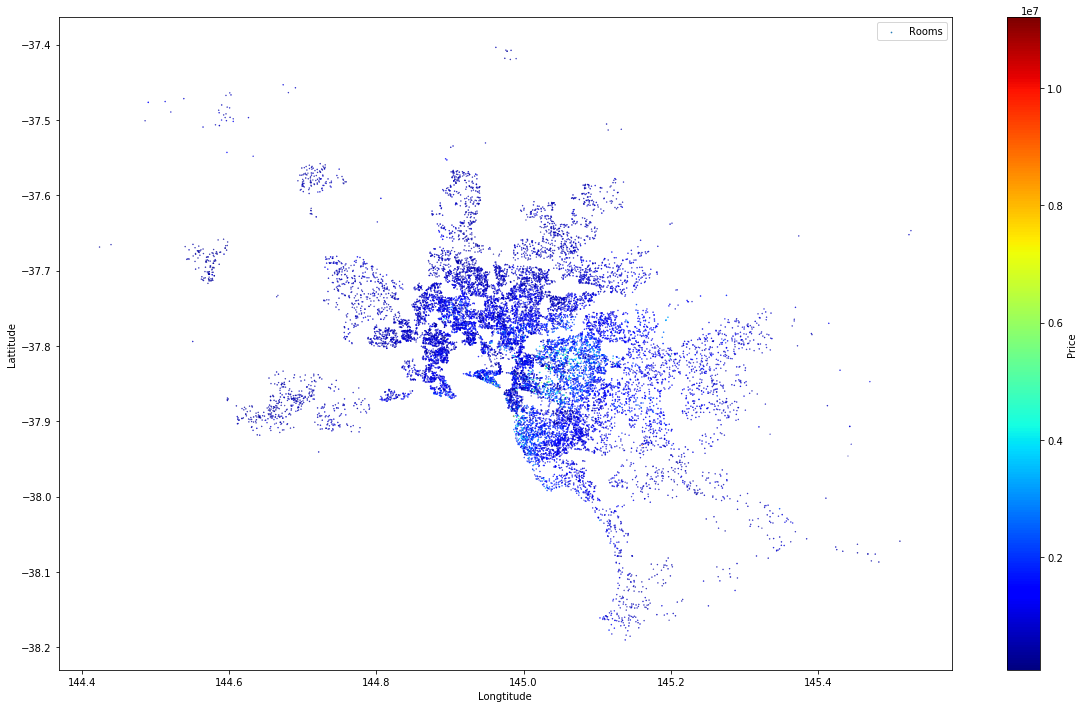

In [12]:
ax = df.plot(kind="scatter", x="Longtitude", y="Lattitude", alpha=1,
    s=df["Rooms"]/20, label="Rooms", figsize=(20,12),
    c="Price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='Longtitude', ylabel='Lattitude')
plt.legend()

In [13]:
corr_matrix = df.corr()

In [14]:
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.467792
Bathroom         0.434294
Bedroom2         0.432851
BuildingArea     0.325532
Car              0.204214
Longtitude       0.197864
Postcode         0.047467
Landsize         0.032372
Propertycount   -0.060310
Distance        -0.209999
Lattitude       -0.216378
YearBuilt       -0.329764
Name: Price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117825210>,
      dtype=object)

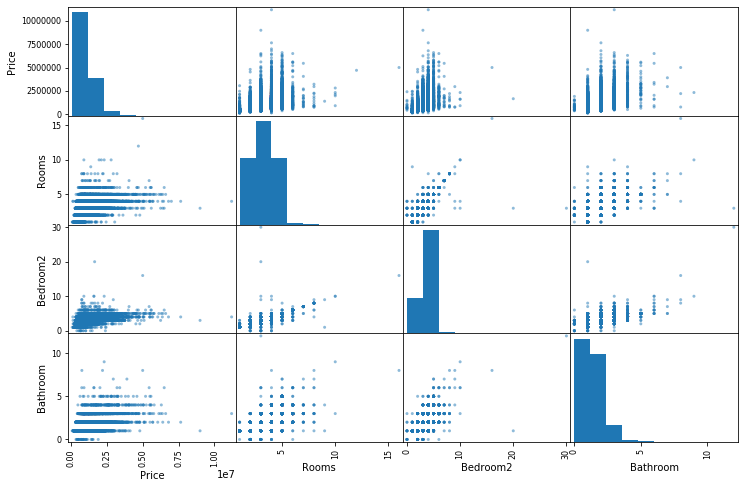

In [15]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Rooms", "Bedroom2",
              "Bathroom"]
scatter_matrix(df[attributes], figsize=(12, 8))

[0, 50, 0, 13000000]

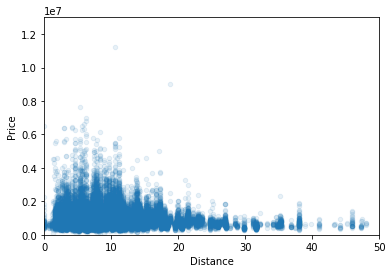

In [16]:
df.plot(kind="scatter", x="Distance", y="Price",
             alpha=0.1)
plt.axis([0, 50, 0, 13000000])

[0, 50, 0, 13000000]

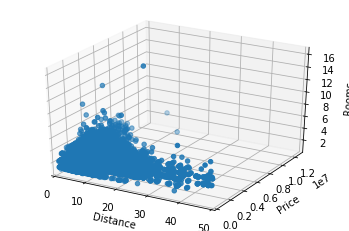

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

xs = df["Distance"]
ys = df["Price"]
zs = df["Rooms"]
ax.scatter(xs, ys, zs)

ax.set_xlabel('Distance')
ax.set_ylabel('Price')
ax.set_zlabel('Rooms')

plt.axis([0, 50, 0, 13000000])

In [25]:
tdata = train_set.dropna(axis=0)
vdata = test_set.dropna(axis=0)

In [26]:
y = tdata.Price

In [27]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [28]:
X = tdata[features]

In [29]:
from sklearn.tree import DecisionTreeRegressor

melbourne_model = DecisionTreeRegressor(random_state=1)

melbourne_model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [30]:
predicted_home_prices = melbourne_model.predict(X)

print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(predicted_home_prices)

Making predictions for the following 5 houses:
       Rooms  Bathroom  Landsize  Lattitude  Longtitude
34138      3       1.0     375.0  -37.75339   144.97687
17997      3       2.0     358.0  -37.71450   144.77132
5160       3       2.0       0.0  -37.93550   145.02760
4427       2       1.0     184.0  -37.79880   144.90200
14968      3       2.0     203.0  -37.75582   144.91061
The predictions are
[1035000.  475000. 1150000. ... 2670000.  450000. 1875000.]


In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, predicted_home_prices)

745.5459590269955